In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_excel("dataset.xls")

In [11]:
df

,device,gpa,semester,degree,age,sex,stress,coping_1,coping_2,coping_3,...,yesterday_5,yesterday_6,yesterday_typical,enough_1,enough_2,enough_3,enough_4,enough_5,enough_6,survey_time
0,pc/laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pc/laptop,NaN,NaN,NaN,NaN,NaN,4.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mobile,NaN,NaN,NaN,NaN,NaN,7.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,pc/laptop,1.6,2.0,1.0,19.0,1.0,3.0,4.0,1.0,1.0,...,16.0,8.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,15.0
1555,mobile,3.0,6.0,1.0,31.0,1.0,3.0,3.0,3.0,4.0,...,2.0,8.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
1556,mobile,NaN,10.0,3.0,24.0,1.0,7.0,2.0,4.0,1.0,...,0.0,8.0,4.0,2.0,1.0,2.0,2.0,1.0,1.0,6.0
1557,pc/laptop,2.3,2.0,1.0,27.0,2.0,5.0,3.0,2.0,4.0,...,0.0,6.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,5.0


In [12]:
df["straight_stress"] = df.apply (lambda row: row["source_6"] + row["source_5"] + row["source_4"] + row["source_3"] + row["source_2"] + row["source_1"] , axis=1) # общий стресс сурсов

In [8]:
df.dropna(subset = ['straight_stress', 'semester'], inplace=True)

In [13]:
df["stress_percent"] = df.apply (lambda row: (row["source_6"] / row["straight_stress"]) , axis=1)
df["stress_percent_2"] = df.apply (lambda row: row["source_3"] / row["straight_stress"], axis=1)

In [14]:
df = df.sort_values(by=['semester'])

In [15]:
df

,device,gpa,semester,degree,age,sex,stress,coping_1,coping_2,coping_3,...,enough_1,enough_2,enough_3,enough_4,enough_5,enough_6,survey_time,straight_stress,stress_percent,stress_percent_2
938,mobile,NaN,1.0,3.0,19.0,2.0,4.0,3.0,2.0,3.0,...,2.0,1.0,3.0,2.0,2.0,2.0,10.0,14.0,0.142857,0.214286
1502,mobile,NaN,1.0,2.0,35.0,1.0,2.0,4.0,3.0,3.0,...,3.0,1.0,1.0,2.0,1.0,1.0,10.0,16.0,0.187500,0.062500
1415,pc/laptop,NaN,1.0,3.0,18.0,2.0,6.0,3.0,3.0,1.0,...,2.0,2.0,3.0,2.0,1.0,2.0,5.0,17.0,0.176471,0.176471
292,pc/laptop,NaN,1.0,3.0,19.0,2.0,6.0,3.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,5.0,11.0,0.363636,0.090909
1293,mobile,NaN,1.0,1.0,19.0,1.0,4.0,3.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,20.0,8.0,0.375000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,pc/laptop,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.181818,0.272727
1352,pc/laptop,NaN,NaN,NaN,NaN,NaN,4.0,3.0,3.0,1.0,...,2.0,2.0,2.0,1.0,2.0,2.0,NaN,13.0,0.230769,0.153846
1407,pc/laptop,NaN,NaN,NaN,NaN,NaN,5.0,3.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.272727,0.272727
1510,pc/laptop,NaN,NaN,NaN,NaN,NaN,5.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.400000,0.100000


In [93]:
avg_per_sem = {}

In [94]:
for index, row in df.iterrows():
    if row["sex"] in [1]:
        sem = int(row["semester"])
        if sem <= 12:
            if row["degree"] in [1, 2]:
                if sem in avg_per_sem:
                    avg_per_sem[sem].append(row["stress_percent"])
                else:
                    avg_per_sem[sem] = [row["stress_percent"]]

In [14]:
#avg_per_sem

In [95]:
avgs = {i: [sum(avg_per_sem[i]) / len(avg_per_sem[i])] for i in avg_per_sem}

In [96]:
avgs

{1: [0.2830357142857143],
 2: [0.2539384226884226],
 3: [0.22718633705475808],
 4: [0.237243218965908],
 5: [0.21481643356643357],
 6: [0.24424980056467938],
 7: [0.3055555555555555],
 8: [0.2540223477441523],
 9: [0.2435064935064935],
 10: [0.23043165984342456],
 11: [0.19090909090909092],
 12: [0.228620921562098]}

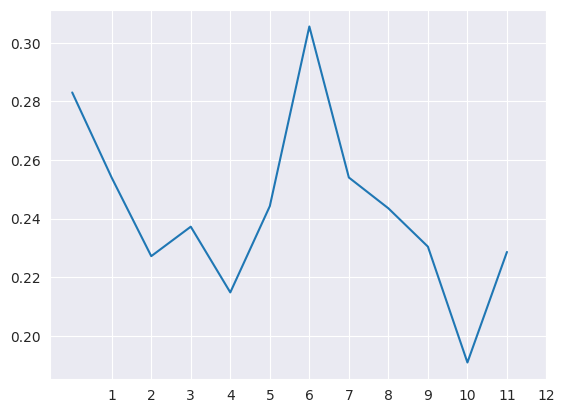

In [97]:
sns.set_style("darkgrid")
plt.plot([avgs[i][0] for i in avgs])
plt.xticks([i for i in range(1, 13)])
plt.show()

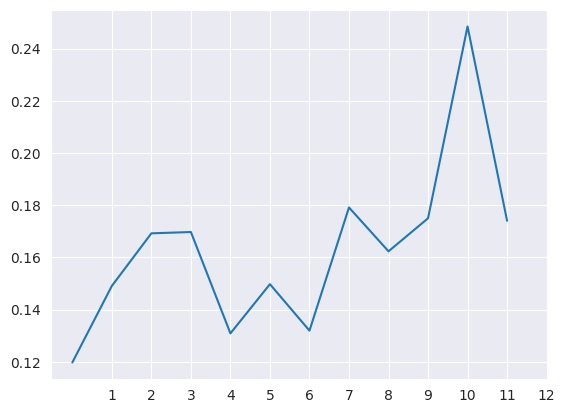

In [100]:
avg_per_sem = {}
for index, row in df.iterrows():
    if row["sex"] in [1]:
        sem = int(row["semester"])
        if sem <= 12:
            if row["degree"] in [1, 2]:
                if sem in avg_per_sem:
                    avg_per_sem[sem].append(row["stress_percent_2"])
                else:
                    avg_per_sem[sem] = [row["stress_percent_2"]]
avgs = {i: [sum(avg_per_sem[i]) / len(avg_per_sem[i])] for i in avg_per_sem}
sns.set_style("darkgrid")
plt.plot([avgs[i][0] for i in avgs])
plt.xticks([i for i in range(1, 13)])
plt.show()

In [17]:
def cast_get(x):
    study = x.week_1 + x.week_2
    work = x.week_3
    mod = abs(study - work)
    
    if (work < study and mod >= 0.1 * max(study, work)):# and (x.enough_1 + x.enough_2 > x.enough_3):
        return "study"
    elif work > study and mod >= 0.1 * max(study, work):
        return "work"
    else:
        return "complex"

In [18]:
df["cast"] = df.apply (lambda row: cast_get(row), axis=1)

In [19]:
df["cast"]

938       study
1502      study
1415      study
292       study
1293      study
         ...   
1329    complex
1352      study
1407      study
1510      study
1547      study
Name: cast, Length: 1559, dtype: object

{1: [0.24699764521193093], 2: [0.25309333107926457], 3: [0.25055542153065374], 4: [0.2509463293117139], 5: [0.2563001813001813], 6: [0.25385909677847357], 7: [0.3070043382543382], 8: [0.2574688341629131], 9: [0.26417867846439275], 10: [0.23197857242516687], 11: [0.21669241252574586], 12: [0.247742979987562]}
{1: [1.0], 2: [0.19619708994708995], 3: [0.19619708994708995], 4: [0.1829078601137425], 5: [0.16269841269841268], 6: [0.17395730043949859], 7: [0.3333333333333333], 8: [0.2357550125313283], 9: [0.2357550125313283], 10: [0.22939754508381954], 11: [0.14572649572649574], 12: [0.18075097245375882]}


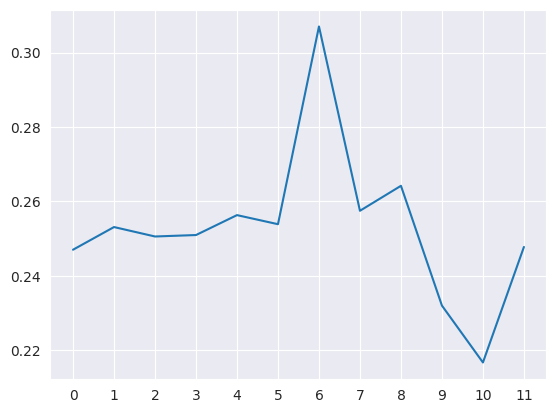

In [292]:
avg_per_sem = {}
for index, row in df.iterrows():
    if row["sex"] in [1, 2]:
        sem = int(row["semester"])
        if sem <= 12 and row["cast"] == "study":
            if row["degree"] in [1, 2]:
                if sem in avg_per_sem:
                    avg_per_sem[sem].append(row["stress_percent"])
                else:
                    avg_per_sem[sem] = [row["stress_percent"]]
# avgs = {i: [sum(avg_per_sem[i]) / len(avg_per_sem[i])] for i in avg_per_sem.keys()}
avgs = {i: [np.average(np.array(avg_per_sem[i]))] for i in avg_per_sem.keys()}
# print({i: `[] for i in avg_per_sem.keys()})
# print(avg_per_sem.keys())

avg_per_sem_2 = {}
for index, row in df.iterrows():
    if row["sex"] in [1, 2]:
        sem = int(row["semester"])
        if sem <= 12 and row["cast"] == "work":
            if row["degree"] in [1, 2]:
                if sem in avg_per_sem_2:
                    avg_per_sem_2[sem].append(row["stress_percent"])
                else:
                    avg_per_sem_2[sem] = [row["stress_percent"]]

avg_per_sem_2[1] = [1]
avgs_2 = {i: [sum(avg_per_sem_2[i]) / len(avg_per_sem_2[i])] if i in avg_per_sem_2.keys() else [sum(avg_per_sem_2[i - 1]) / len(avg_per_sem_2[i - 1])] for i in range(1, 13)}

print(avgs,avgs_2,sep="\n")
sns.set_style("darkgrid")
plt.plot([avgs[i][0] for i in avgs])
# plt.plot([avgs_2[i][0] for i in avgs_2])
plt.xticks([i for i in range(12)])
plt.show()

In [112]:
# Касты
# Те кто короче ради учёбы, не падает
# Те кто раде

# поработать с стади графиком и подвизать гпа
# брать несреднее аврифметическое стреса а моду или мелиану ну вот эти х из тер вера

In [241]:
df

,device,gpa,semester,degree,age,sex,stress,coping_1,coping_2,coping_3,...,enough_2,enough_3,enough_4,enough_5,enough_6,survey_time,straight_stress,stress_percent,stress_percent_2,cast
0,mobile,NaN,1.0,1.0,19.0,2.0,5.0,3.0,2.0,1.0,...,1.0,2.0,1.0,2.0,1.0,10.0,15.0,1.000000,0.133333,study
779,pc/laptop,NaN,1.0,3.0,19.0,2.0,4.0,4.0,3.0,1.0,...,1.0,2.0,2.0,1.0,1.0,5.0,9.0,0.888889,0.111111,study
778,pc/laptop,NaN,1.0,3.0,21.0,1.0,6.0,2.0,3.0,1.0,...,1.0,NaN,3.0,1.0,2.0,5.0,8.0,2.250000,0.125000,study
777,mobile,NaN,1.0,3.0,18.0,2.0,3.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,3.0,14.0,0.428571,0.214286,study
776,pc/laptop,NaN,1.0,3.0,19.0,2.0,6.0,3.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,5.0,11.0,2.181818,0.090909,study
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,mobile,1.6,21.0,2.0,29.0,2.0,4.0,4.0,3.0,1.0,...,3.0,3.0,1.0,1.0,1.0,8.0,14.0,1.142857,0.214286,study
770,pc/laptop,2.2,22.0,2.0,30.0,2.0,6.0,3.0,1.0,1.0,...,1.0,3.0,3.0,1.0,2.0,15.0,18.0,1.000000,0.166667,work
1141,pc/laptop,NaN,22.0,3.0,30.0,2.0,6.0,4.0,3.0,1.0,...,1.0,2.0,2.0,1.0,2.0,10.0,15.0,1.600000,0.066667,study
771,pc/laptop,2.2,22.0,2.0,25.0,2.0,2.0,2.0,4.0,4.0,...,1.0,2.0,2.0,2.0,2.0,10.0,12.0,0.500000,0.166667,study


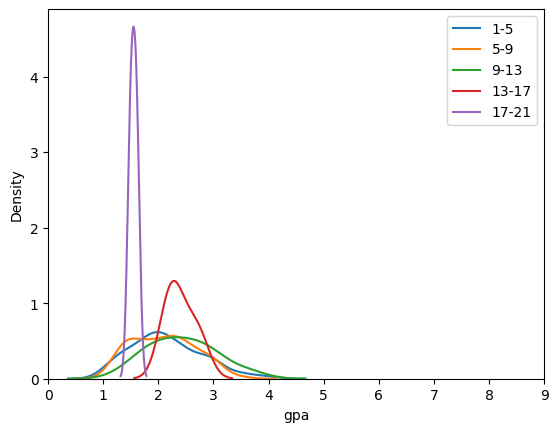

In [51]:
import time

df_back = df.loc[(df["degree"] == 1) & (df["cast"] == "study")]

FAKE_STRESS = [
    [5, 5, 6, 4, 6, 7, 5, 5],
    [5, 5, 4, 5, 5, 5, 3, 3],
    [3, 3, 3, 4, 4, 3, 4, 3],
    [3, 3, 3, 5, 4, 2, 3, 3],
    [3, 3, 4, 2, 5, 3, 3, 3],
    [3, 4, 4, 3, 3, 4, 2, 1],
]

ind = 0
for i in range(1, 22, 4):
    # stress = pd.DataFrame(FAKE_STRESS[ind], columns=['stress'])
    ind += 1
    sns.kdeplot(data=df_back.loc[(i <= df_back["semester"]) & (df_back["semester"] <= i + 4)], x="gpa", label=str(i))
    # time.sleep(1)
    # sns.kdeplot(data=stress, x="stress", label=str(i))
    plt.legend(labels = [str(i) + "-" + str(i+4) + " | " + str(sum(df_back.loc[(i <= df_back["semester"]) & (df_back["semester"] <= i + 4)].value_counts("semester")))])
    plt.xlim([0,9])
    # plt.show()
plt.legend(labels=[str(i) + "-" + str(i+4) for i in range(1,22,4)])
# sns.kdeplot(data=df.loc[df["semester"] == 2], x="stress")
# sns.kdeplot(data=df.loc[df["semester"] == 3], x="stress")
# sns.kdeplot(data=df.loc[df["semester"] == 4], x="stress")
# sns.kdeplot(data=df.loc[df["semester"] == 5], x="stress")
# sns.kdeplot(data=df.loc[df["semester"] == 6], x="stress", color="black")
# sns.kdeplot(data=df.loc[df["semester"] == 2], x="stress")lot.show - PyData |
# sns.kdeplot(data=df.loc[df["semester"] == 3], x="stress")
# sns.kdeplot(data=df.loc[df["semester"] == 4], x="stress")
# sns.kdeplot(data=df.loc[df["semester"] == 10], x="stress")

<Axes: xlabel='semester', ylabel='stress'>

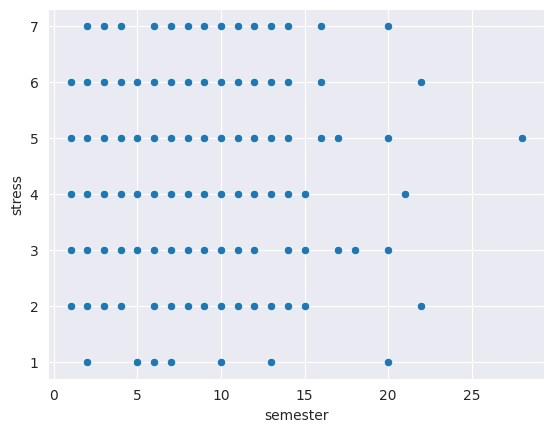

In [328]:
sns.scatterplot(data=df.loc[df["cast"] == "study"], x="semester", y="stress")

<Axes: xlabel='semester', ylabel='stress'>

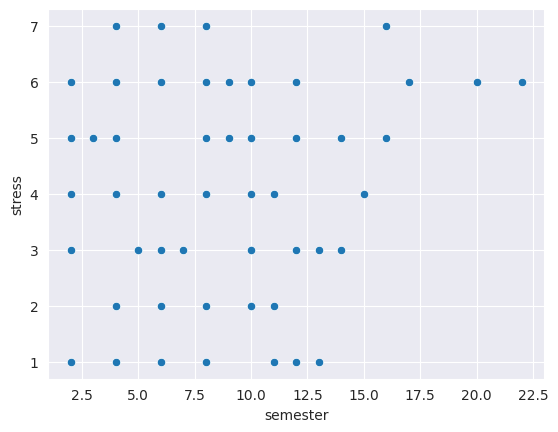

In [247]:
sns.scatterplot(data=df.loc[df["cast"] == "work"], x="semester", y="stress")

<Axes: xlabel='semester', ylabel='stress'>

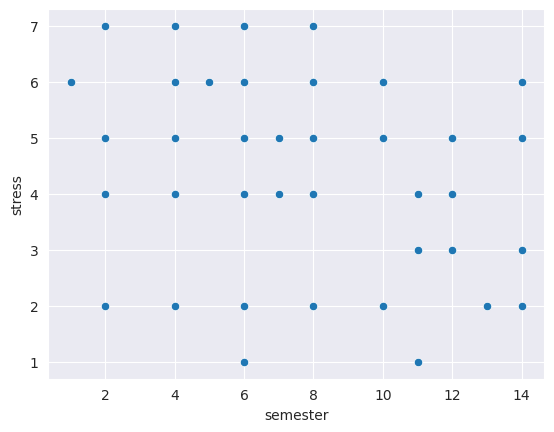

In [246]:
sns.scatterplot(data=df.loc[df["cast"] == "complex"], x="semester", y="stress")

<Axes: xlabel='semester', ylabel='stress'>

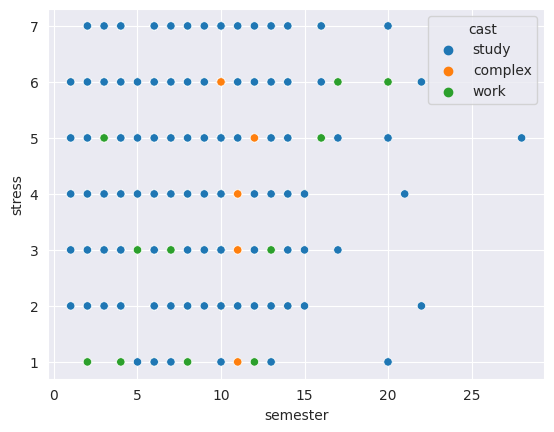

In [250]:
sns.scatterplot(data=df, x="semester", y="stress", hue="cast")

In [368]:
df["reverse_gpa"] = df.apply (lambda row: 5 - row["gpa"] , axis=1) # общий стресс сурсов

<Axes: xlabel='semester', ylabel='reverse_gpa'>

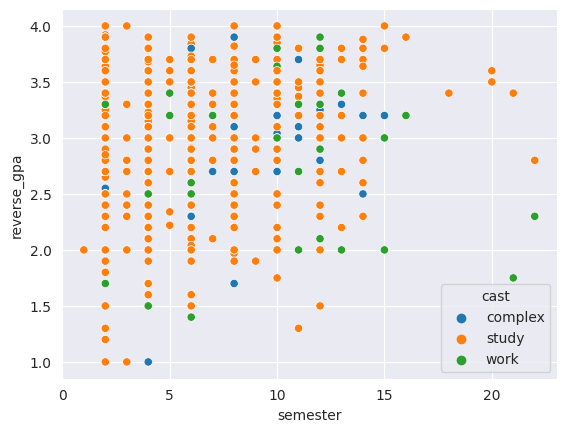

In [369]:
sns.scatterplot(data=df, x="semester", y="reverse_gpa", hue="cast")

<Axes: xlabel='source_6_per', ylabel='reverse_gpa'>

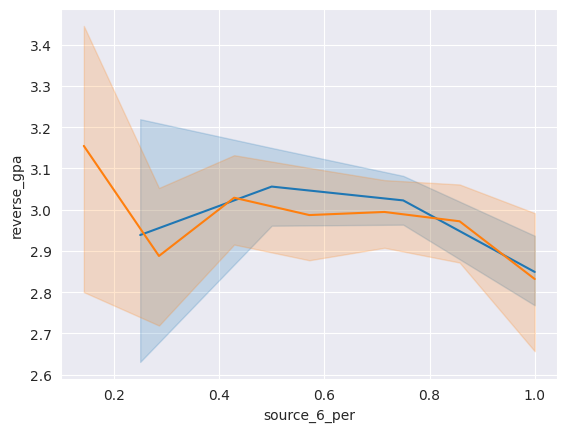

In [382]:
df_work = df.copy()
df_work["source_6_per"] = df.apply (lambda row: row["source_6"] / 4, axis=1)
df_work["stress_per"] = df.apply (lambda row: row["stress"] / 7, axis=1)
sns.lineplot(data=df_work, x="source_6_per", y="reverse_gpa")

sns.lineplot(data=df_work, x="stress_per", y="reverse_gpa")
# sns.scatterplot(data=df, x="semester", y="reverse_gpa", hue="cast")